Unsupervised Learning using Scikit Learn

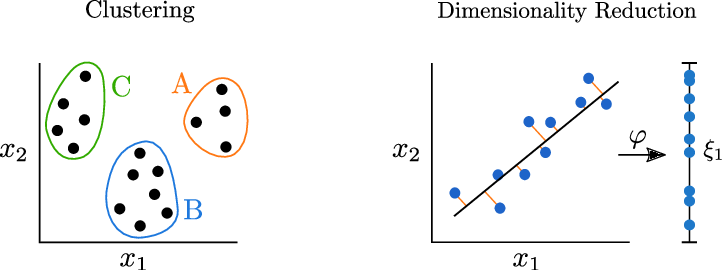

The following topics will be covered

Overview of unsupervised learning algorithms in Scikit-learn
Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
Dimensionality reduction (PCA) and manifold learning (t-SNE)


Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms

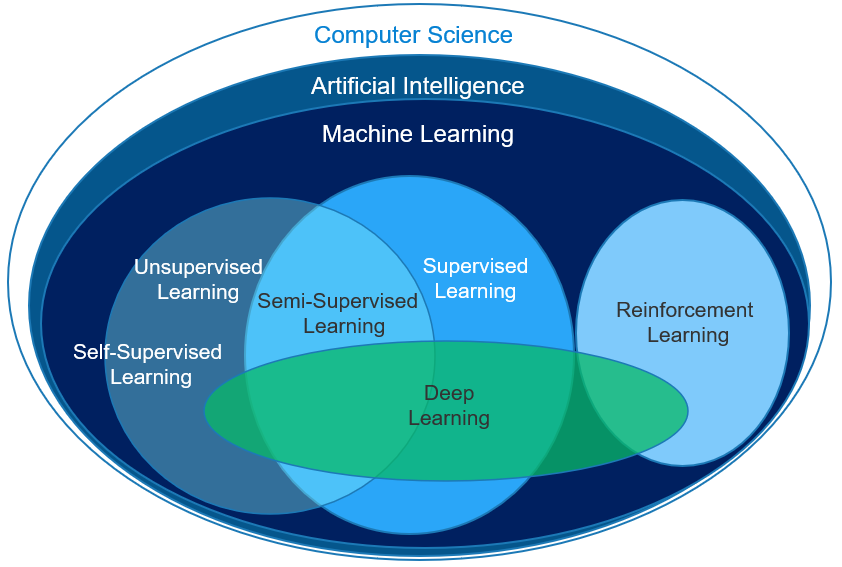

Here are the topics in machine learning that we're studying in this course 

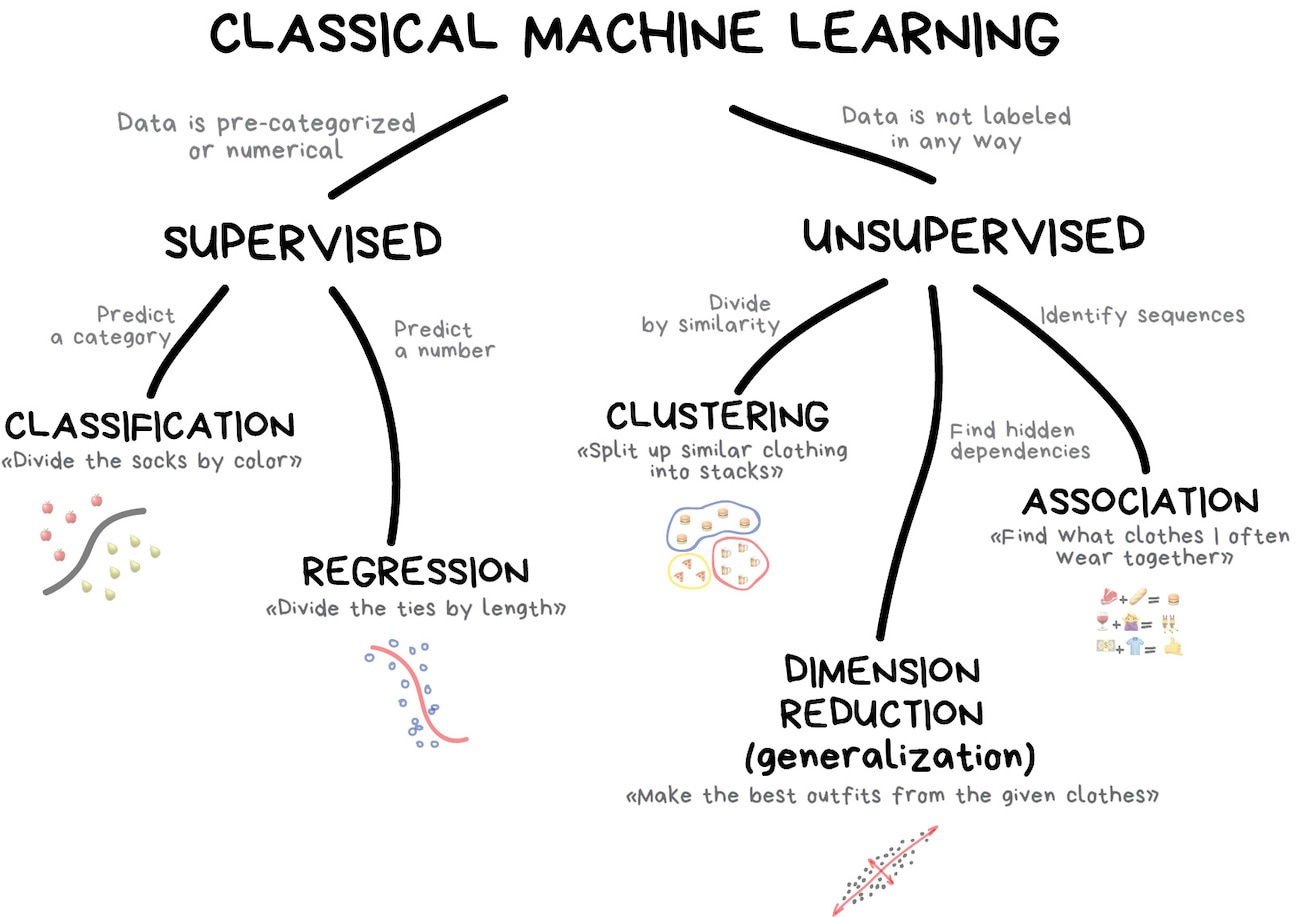



Clustering

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups. Scikit-learn offers several clustering algorithms.

Here is a visual representation of clustering:

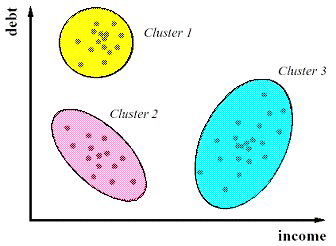

Here are some real-world applications of clustering:

Customer segmentation
Product recommendation
Feature engineering
Anomaly/fraud detection
Taxonomy creation

We'll use the Iris flower dataset to study some of the clustering algorithms available in scikit-learn. It contains various measurements for 150 flowers belonging to 3 different species.

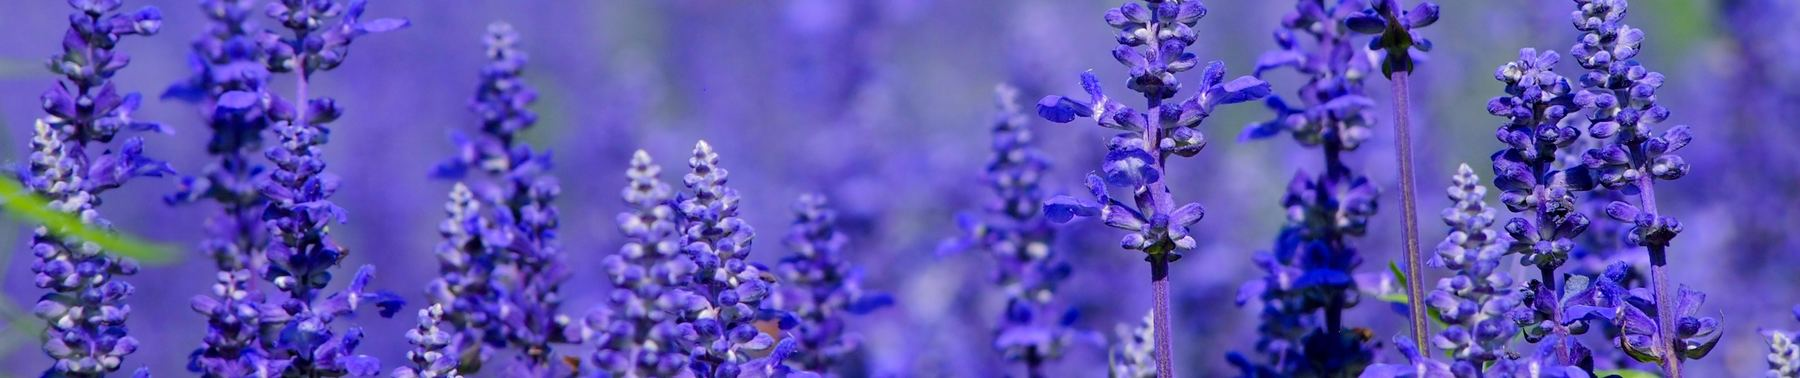

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import pandas as pd

In [4]:
iris_df = pd.read_csv(r'C:\Users\Dell\Downloads\Data Science Stuff\Datasets\Project 6\archive\IRIS.csv')

In [5]:
iris_df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

For sake of this project we are gonna going to ignore the specices column and try to predict them on our own

<Axes: xlabel='sepal_length', ylabel='petal_length'>

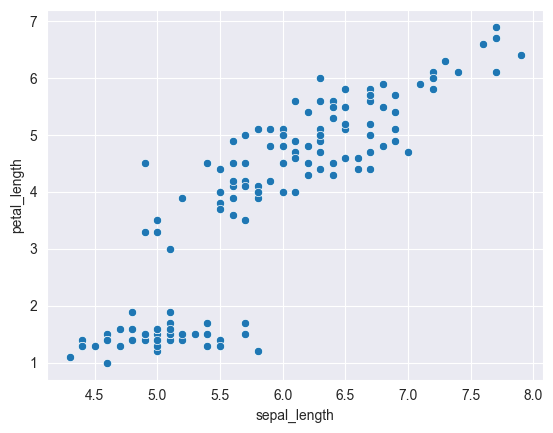

In [8]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length')

As we are ignoring the specices column and try to predict them on our own we can clearly see that there are few clusters forming here

In [11]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [12]:
X = iris_df[numeric_cols]

K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

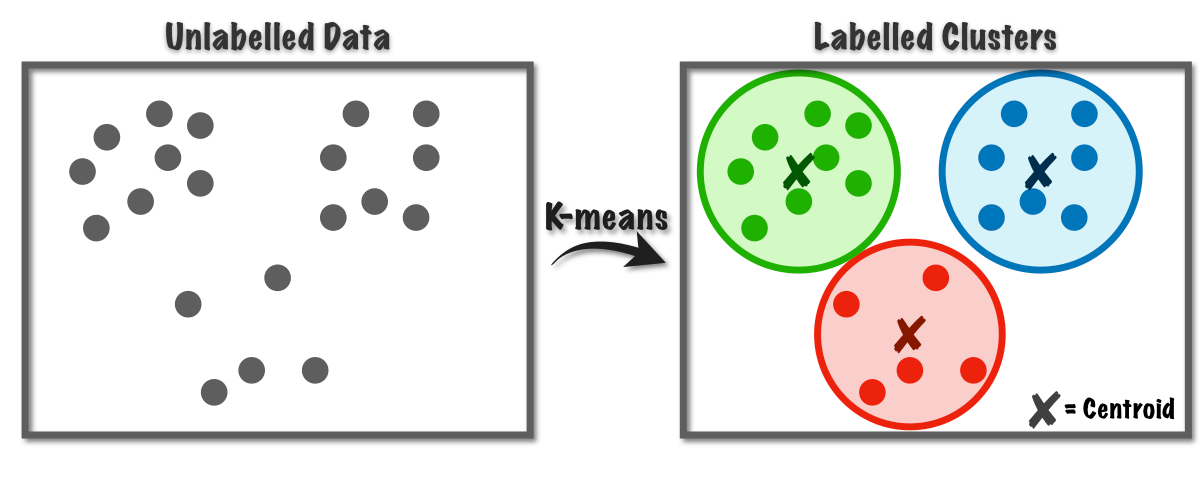

Here's how the K-means algorithm works:

Pick K random objects as the initial cluster centers.
Classify each object into the cluster whose center is closest to the point.
For each cluster of classified objects, compute the centroid (mean).
Now reclassify each object using the centroids as cluster centers.
Calculate the total variance of the clusters (this is the measure of goodness).
Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.



Let's apply K-means clustering to the Iris dataset.

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=3, random_state=42)

In [15]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [17]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

We can now classify points using the model.

In [18]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [19]:
preds = model.predict(X)

In [20]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

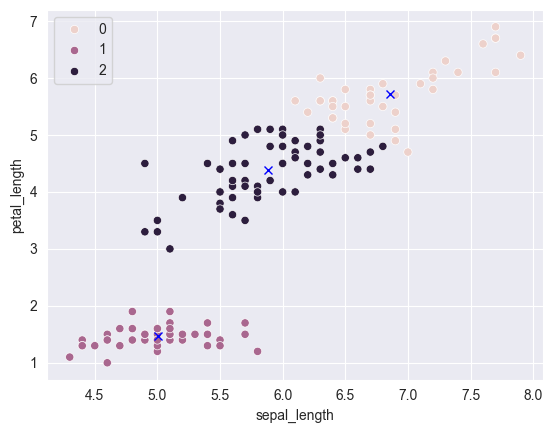

In [23]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to KMeans.

We can check the "goodness" of the fit by looking at model.inertia_, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [24]:
model.inertia_

78.94506582597731

Let's try creating 6 clusters

In [25]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [26]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 1, 5, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

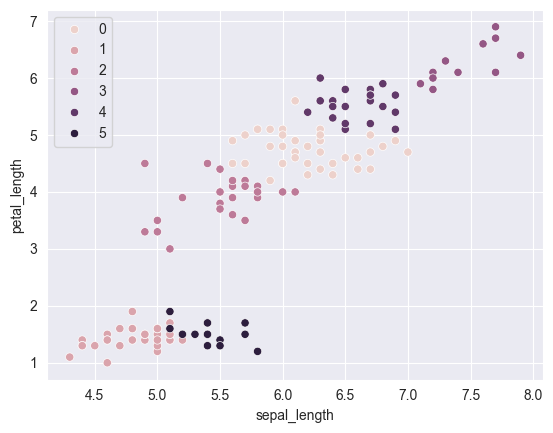

In [28]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)

In [29]:
model.inertia_

39.251830892636775

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

Text(0, 0.5, 'Inertia')

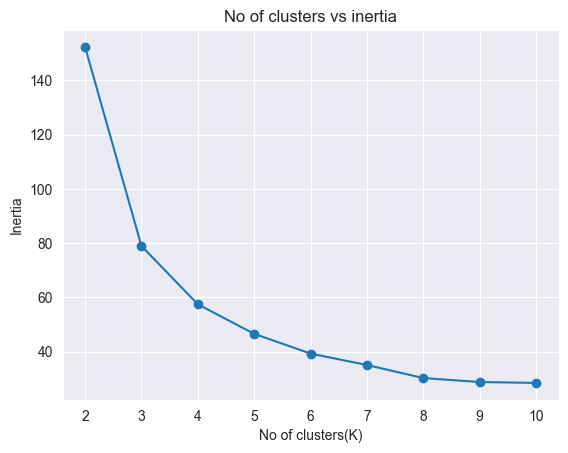

In [31]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No of clusters vs inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No of clusters(K)')
plt.ylabel('Inertia')

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

Another Unsupervised Method is DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

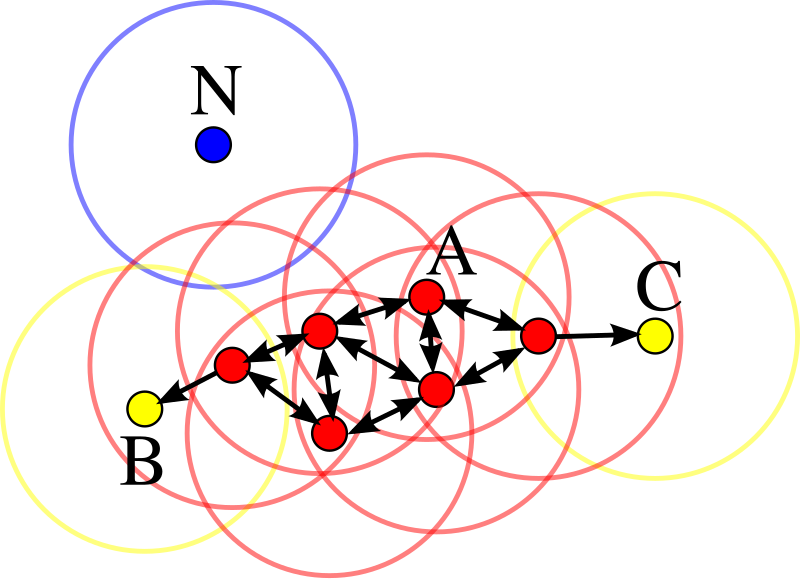



In [32]:
from sklearn.cluster import DBSCAN

In [56]:
model = DBSCAN(eps=1.1, min_samples=4)

In [57]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [58]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<Axes: xlabel='sepal_length', ylabel='petal_length'>

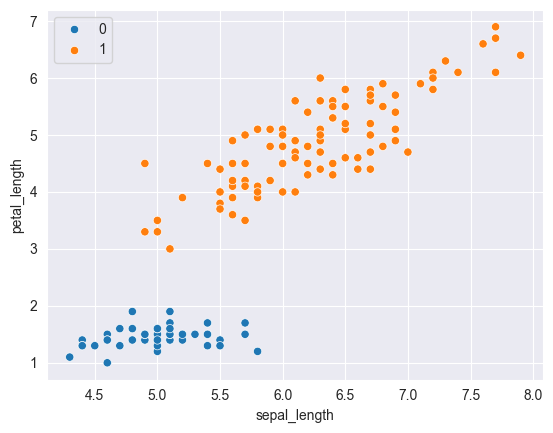

In [59]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_)

Here's how the results of DBSCAN and K Means differ:

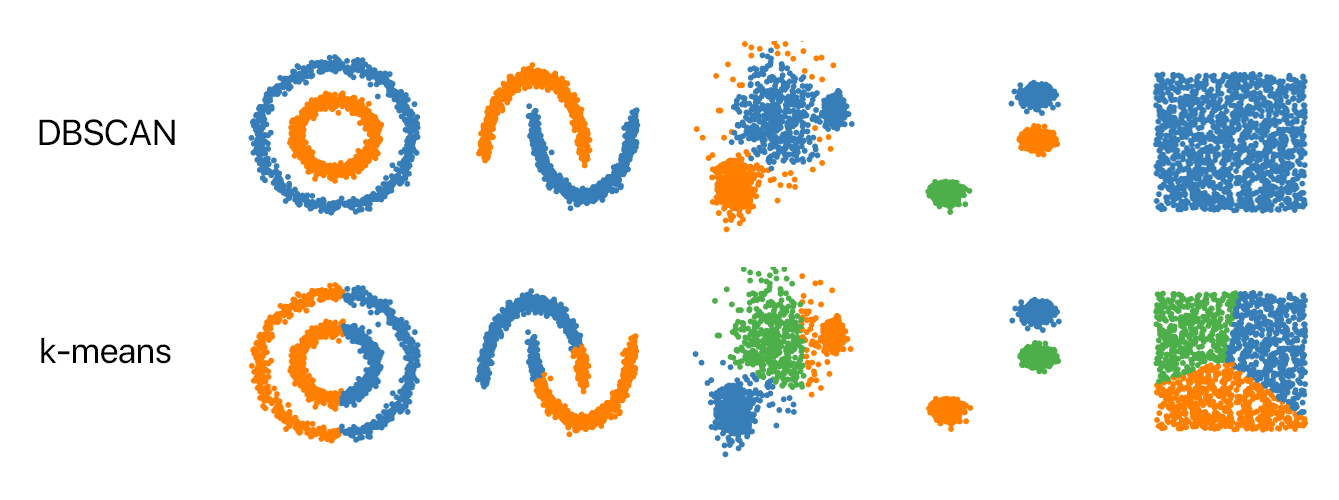

Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

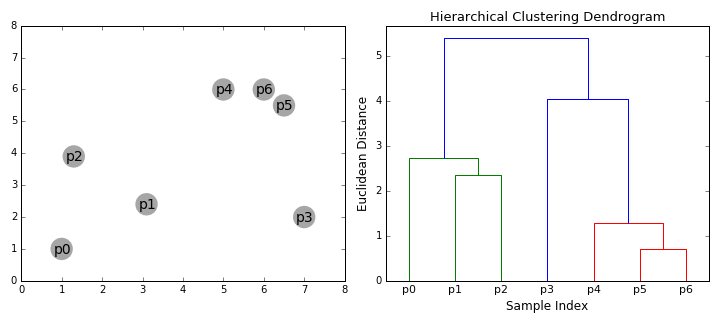

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster.
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
4. Repeat steps 2 and 3 till there's just one cluster left.

Dimensionality Reduction and Manifold Learning
In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number.

Applications of dimensionality reduction:

Reducing size of data without loss of information
Training machine learning models efficiently
Visualizing high-dimensional data in 2/3 dimensions

Principal Component Analysis (PCA)
Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection.

Here's an example of PCA to reduce 2D data to 1D:

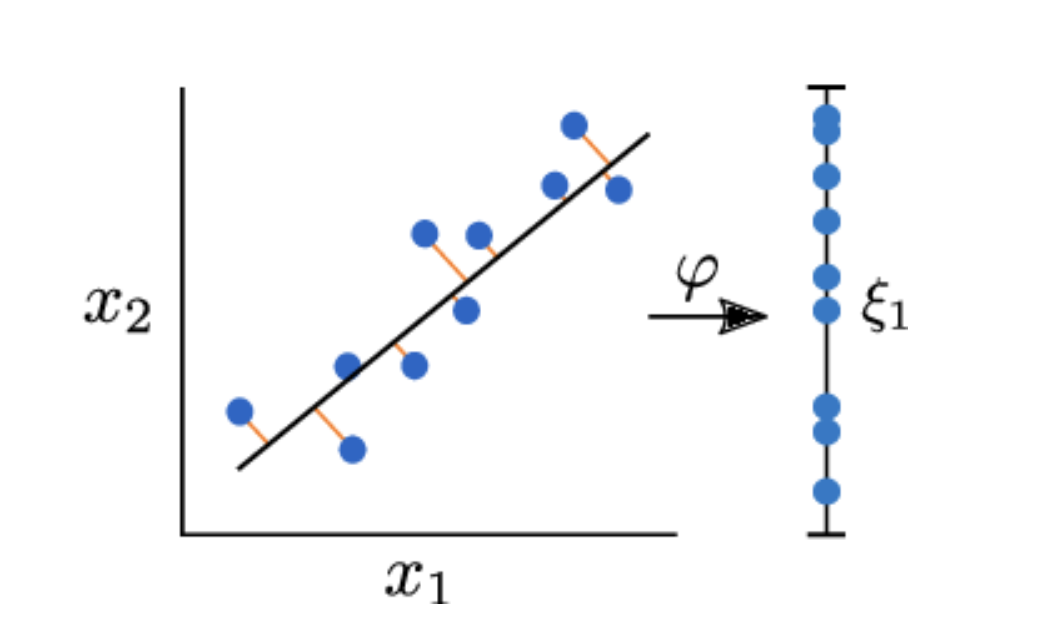

Here's an example of PCA to reduce 3D data to 2D:

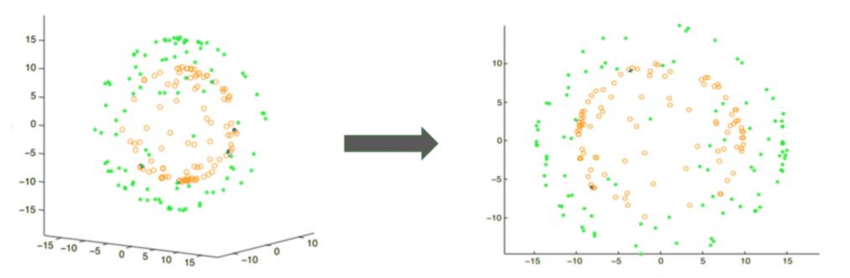

Let's apply Principal Component Analysis to the Iris dataset.

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=2)

In [71]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [62]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [63]:
pca

PCA(n_components=2)

In [74]:
iris_df[numeric_cols]

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [64]:
transformed = pca.transform(iris_df[numeric_cols])

Here we've converted out 4-D data into 2-D data

In [72]:
transformed

array([[-23.197245  ,  -2.3279495 ],
       [-20.457767  ,  -1.3809544 ],
       [-20.734205  ,  -2.6074412 ],
       [-20.227306  ,  -2.2370276 ],
       [-23.278816  ,  -2.5928063 ],
       [-25.353947  ,  -1.6851239 ],
       [-20.951574  ,  -3.0084915 ],
       [-22.500647  ,  -1.8823601 ],
       [-19.460876  ,  -2.355221  ],
       [-21.083271  ,  -1.5865973 ],
       [-24.701681  ,  -2.355452  ],
       [-21.878994  ,  -1.516307  ],
       [-20.259129  ,  -1.6951846 ],
       [-19.418251  ,  -3.0034454 ],
       [-25.806517  ,  -3.0372255 ],
       [-26.229023  ,  -2.5206718 ],
       [-25.190388  ,  -2.7362869 ],
       [-23.261658  ,  -2.1253948 ],
       [-25.739256  ,  -1.7807815 ],
       [-24.443764  ,  -2.0092633 ],
       [-24.04976   ,  -1.0674957 ],
       [-24.085789  ,  -1.8606625 ],
       [-21.221914  ,  -3.774905  ],
       [-22.908278  ,  -0.7401854 ],
       [-21.91337   ,  -0.56970346],
       [-20.933004  ,  -0.92123497],
       [-22.765638  ,  -1.211732  ],
 

<Axes: >

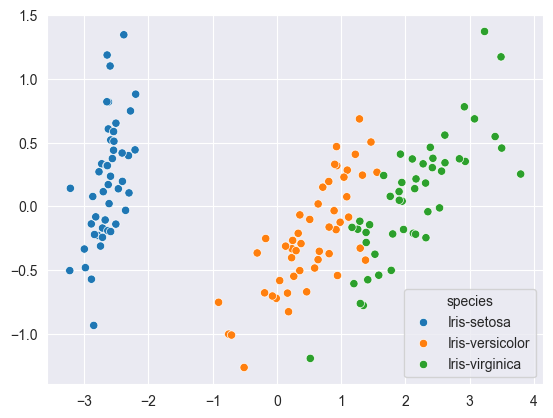

In [65]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions.

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

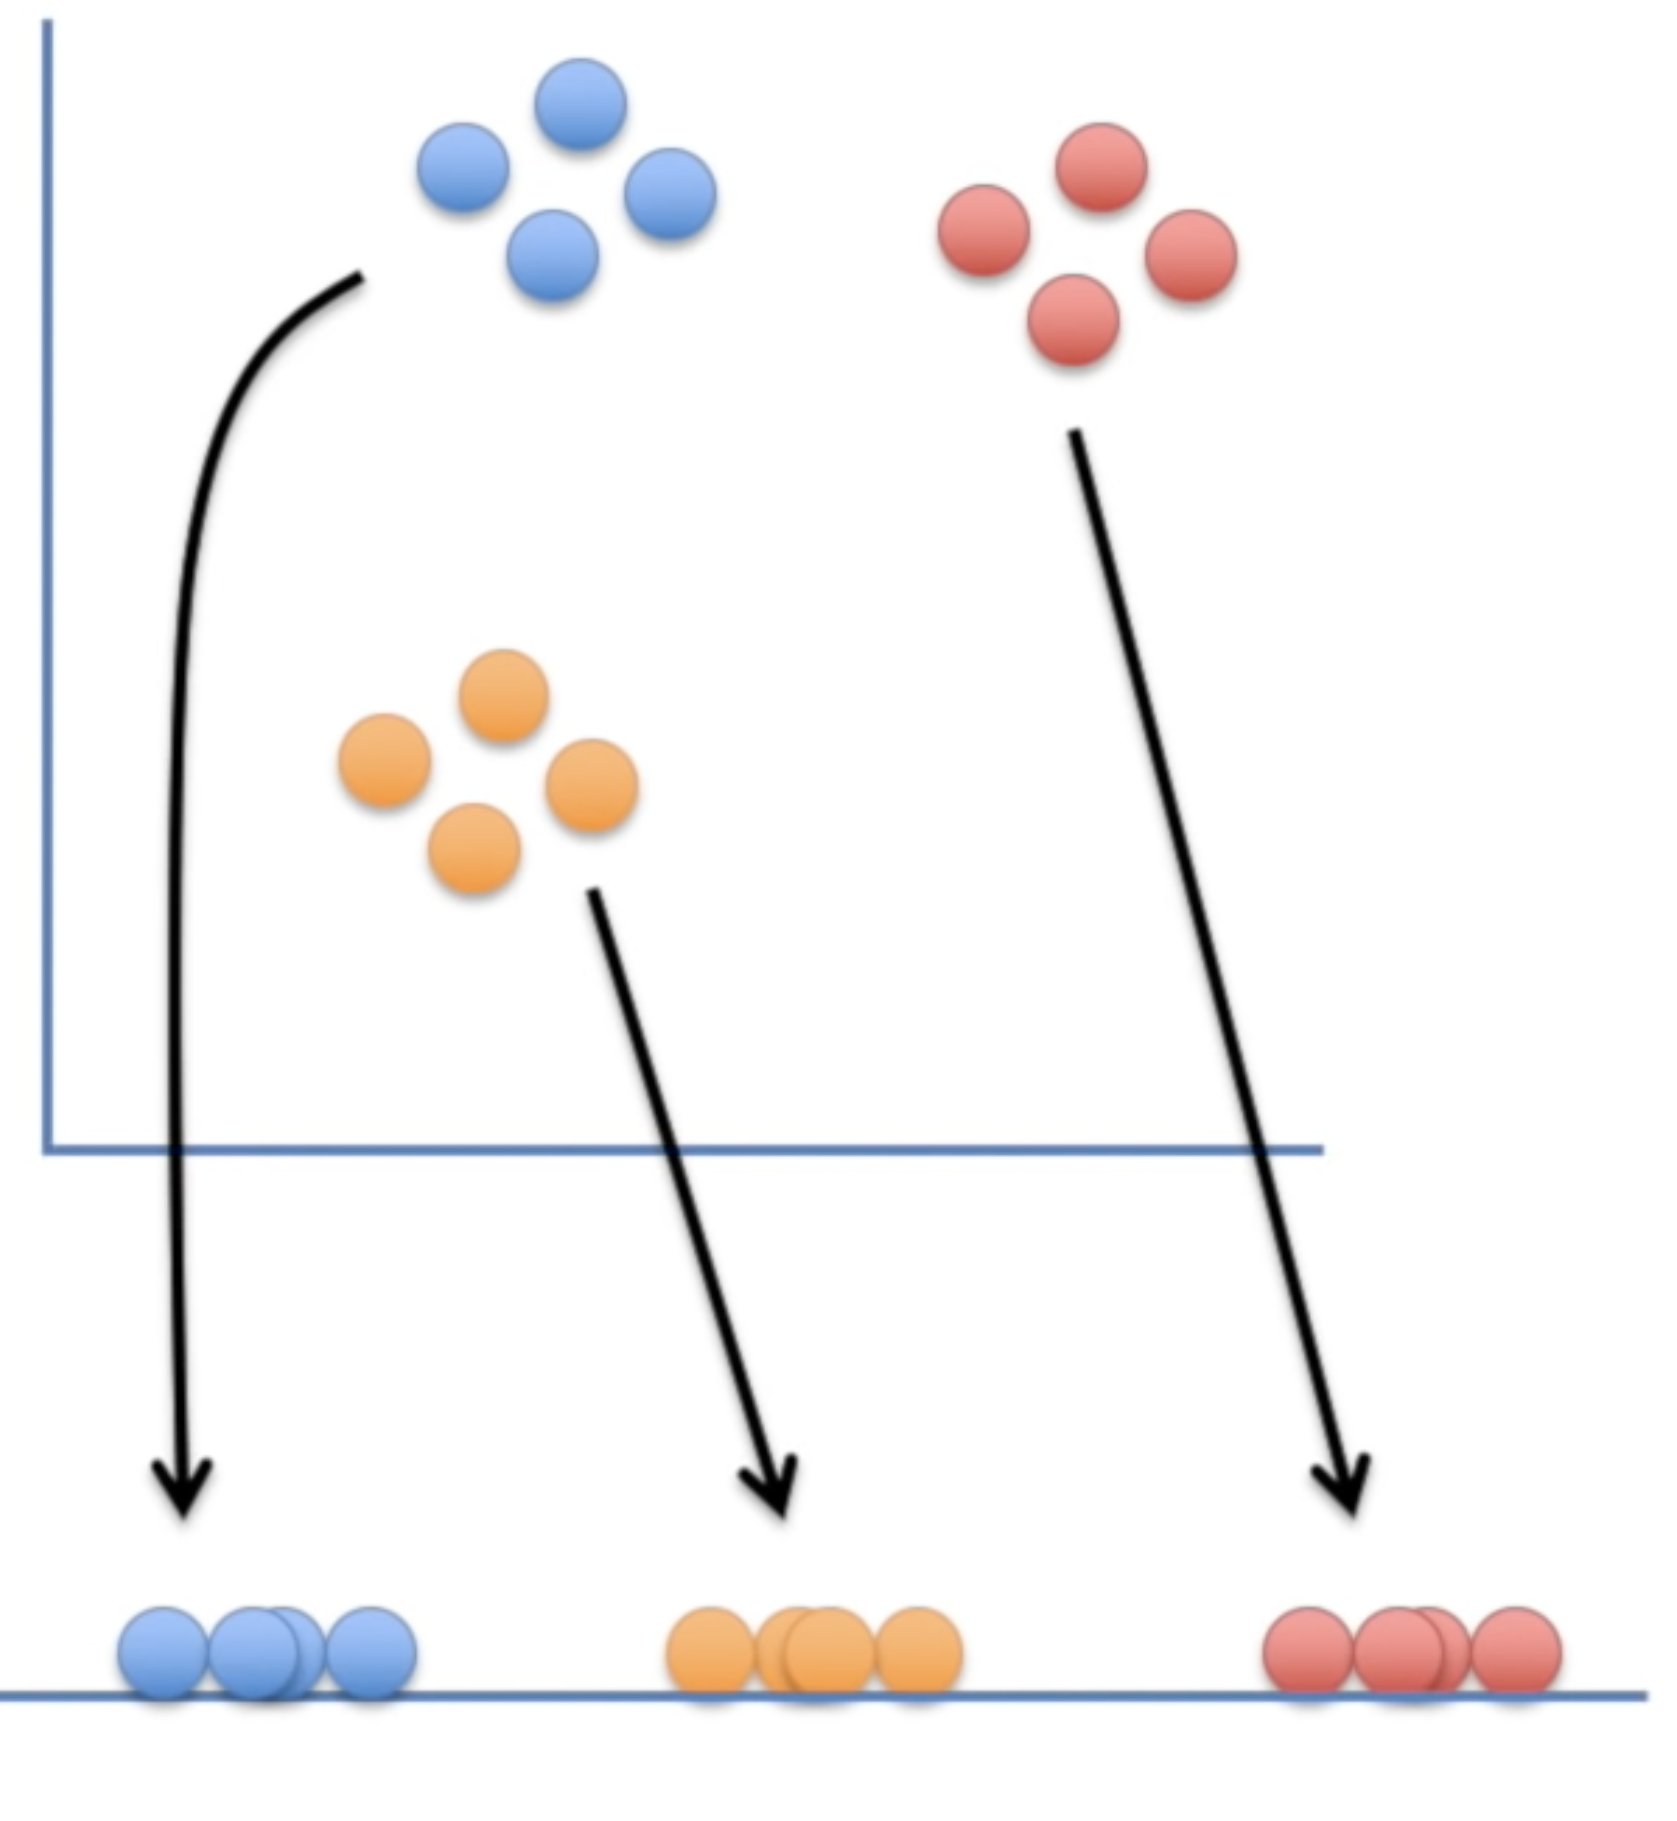

Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions

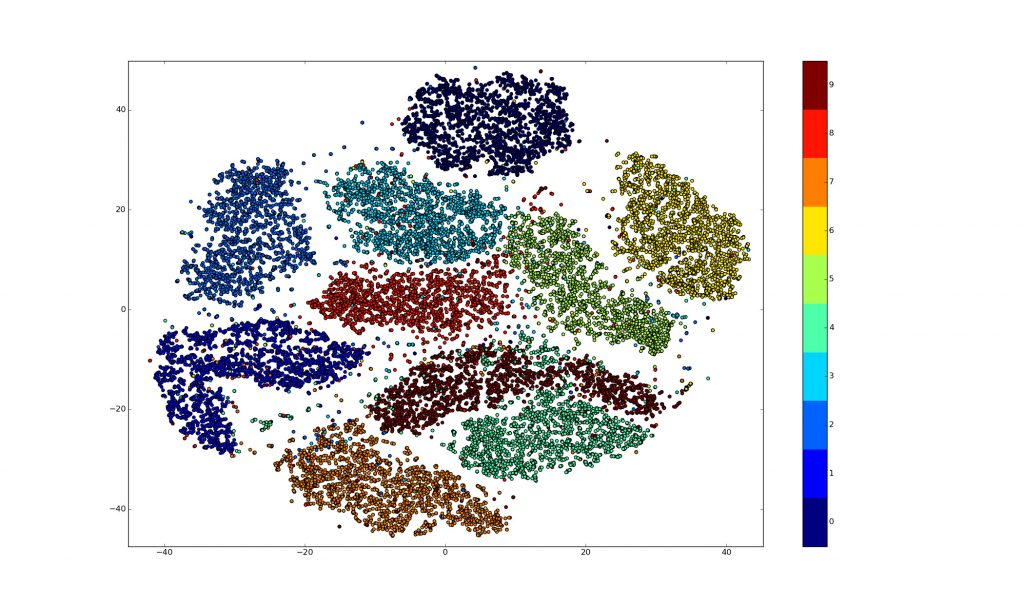



In [67]:
from sklearn.manifold import TSNE

In [68]:
tsne = TSNE(n_components=2)

In [69]:
transformed = tsne.fit_transform(iris_df[numeric_cols])

<Axes: >

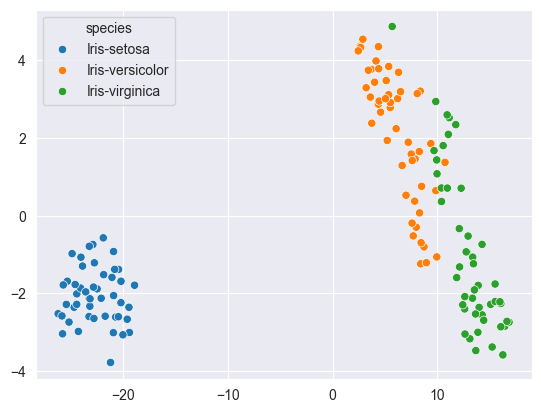

In [70]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

As you can see, the flowers from the same species are clustered very closely together. The relative distance between the species is also conveyed by the gaps between the clusters.